# ELEC 576 – Introduction to Deep Learning – Assignment 0

Due: 11:00am 09/13/2017

*On my honor, I have neither given nor received any unauthorized aid on this assignment.*

Daniel LeJeune, S01276871

## Task 1

In [1]:
!conda info

Current conda install:

               platform : linux-64
          conda version : 4.3.21
       conda is private : False
      conda-env version : 4.3.21
    conda-build version : not installed
         python version : 3.6.1.final.0
       requests version : 2.14.2
       root environment : /home/daniel/opt/miniconda3  (writable)
    default environment : /home/daniel/opt/miniconda3/envs/elec576
       envs directories : /home/daniel/opt/miniconda3/envs
                          /home/daniel/.conda/envs
          package cache : /home/daniel/opt/miniconda3/pkgs
                          /home/daniel/.conda/pkgs
           channel URLs : https://repo.continuum.io/pkgs/free/linux-64
                          https://repo.continuum.io/pkgs/free/noarch
                          https://repo.continuum.io/pkgs/r/linux-64
                          https://repo.continuum.io/pkgs/r/noarch
                          https://repo.continuum.io/pkgs/pro/linux-64
                          https:/

## Task 2

In [2]:
import numpy as np
from scipy import linalg
import scipy.sparse.linalg
from scipy import signal

n = 2
d = 4
X = np.arange(d**n).reshape((d,) * n)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [3]:
y = np.arange(d)
y

array([0, 1, 2, 3])

In [4]:
X.ndim

2

In [5]:
X.size

16

In [6]:
X.shape

(4, 4)

In [7]:
X.shape[n-1]

4

In [8]:
np.array([[1, 2, 3], [4, 5, 6]], dtype=float)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [9]:
np.vstack([np.hstack([X, y.reshape((-1, 1))]), np.hstack([y.reshape((1, -1)), np.eye(1)])])

array([[  0.,   1.,   2.,   3.,   0.],
       [  4.,   5.,   6.,   7.,   1.],
       [  8.,   9.,  10.,  11.,   2.],
       [ 12.,  13.,  14.,  15.,   3.],
       [  0.,   1.,   2.,   3.,   1.]])

In [10]:
y[-1]

3

In [11]:
X[1,3]

7

In [12]:
X[1]

array([4, 5, 6, 7])

In [13]:
X[0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [14]:
X[-2:]

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [15]:
X[0:2][:,1:3]

array([[1, 2],
       [5, 6]])

In [16]:
X[np.ix_([0, 1, 3], [0, 2])]

array([[ 0,  2],
       [ 4,  6],
       [12, 14]])

In [17]:
X[1:4:2, :]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [18]:
X[::2, :]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [19]:
X[::-1, :]

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [20]:
X[np.r_[:len(X), 0]]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [ 0,  1,  2,  3]])

In [21]:
X.T

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [22]:
X.conj().T

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [23]:
X.dot(y)

array([14, 38, 62, 86])

In [24]:
X @ y

array([14, 38, 62, 86])

In [25]:
X / (1 + X)

array([[ 0.        ,  0.5       ,  0.66666667,  0.75      ],
       [ 0.8       ,  0.83333333,  0.85714286,  0.875     ],
       [ 0.88888889,  0.9       ,  0.90909091,  0.91666667],
       [ 0.92307692,  0.92857143,  0.93333333,  0.9375    ]])

In [26]:
X ** 3

array([[   0,    1,    8,   27],
       [  64,  125,  216,  343],
       [ 512,  729, 1000, 1331],
       [1728, 2197, 2744, 3375]])

In [27]:
X > 5

array([[False, False, False, False],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [28]:
np.nonzero(X)

(array([0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
 array([1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]))

In [29]:
X[:, np.nonzero(y > 1)[0]]

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

In [30]:
X[:, y > 1]

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

In [31]:
X2 = X.copy()
X2[X2 < 5] = 0
X2

array([[ 0,  0,  0,  0],
       [ 0,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [32]:
y2 = y.copy()
y2

array([0, 1, 2, 3])

In [33]:
x = X[1, :].copy()
x

array([4, 5, 6, 7])

In [34]:
x2 = X2.flatten()
x2

array([ 0,  0,  0,  0,  0,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [35]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [36]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
np.arange(1, 11)[:, np.newaxis]

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [38]:
np.zeros((3, 4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [39]:
np.zeros((3, 4, 5))

array([[[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]])

In [40]:
np.ones((3, 4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [41]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [42]:
np.diag(y)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [43]:
np.diag(y, 0)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [44]:
np.random.rand(3, 4)

array([[ 0.65427341,  0.78225925,  0.94788011,  0.80633951],
       [ 0.77934013,  0.72441391,  0.86601446,  0.83385882],
       [ 0.05957731,  0.84765152,  0.61426029,  0.77384177]])

In [45]:
np.linspace(1, 3, 4)

array([ 1.        ,  1.66666667,  2.33333333,  3.        ])

In [46]:
np.mgrid[0:9, 0:6]

array([[[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8]],

       [[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]])

In [47]:
np.ogrid[0:9, 0:6]

[array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]]), array([[0, 1, 2, 3, 4, 5]])]

In [48]:
np.meshgrid([1, 2, 4], [2, 4, 5])

[array([[1, 2, 4],
        [1, 2, 4],
        [1, 2, 4]]), array([[2, 2, 2],
        [4, 4, 4],
        [5, 5, 5]])]

In [49]:
np.ix_([1, 2, 4], [2, 4, 5])

(array([[1],
        [2],
        [4]]), array([[2, 4, 5]]))

In [50]:
np.tile(X, (1, 2))

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11],
       [12, 13, 14, 15, 12, 13, 14, 15]])

In [51]:
np.concatenate((X, X), 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11],
       [12, 13, 14, 15, 12, 13, 14, 15]])

In [52]:
np.concatenate((X, X))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [53]:
X.max()

15

In [54]:
X.max(0)

array([12, 13, 14, 15])

In [55]:
X.max(1)

array([ 3,  7, 11, 15])

In [56]:
np.maximum(X - 5, 0)

array([[ 0,  0,  0,  0],
       [ 0,  0,  1,  2],
       [ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])

In [57]:
np.sqrt(np.dot(y, y))

3.7416573867739413

In [58]:
np.sqrt(y @ y)

3.7416573867739413

In [59]:
np.logical_and(X > 5, X < 10)

array([[False, False, False, False],
       [False, False,  True,  True],
       [ True,  True, False, False],
       [False, False, False, False]], dtype=bool)

In [60]:
np.logical_or(X < 5, X > 10)

array([[ True,  True,  True,  True],
       [ True, False, False, False],
       [False, False, False,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [61]:
X & 0xc

array([[ 0,  0,  0,  0],
       [ 4,  4,  4,  4],
       [ 8,  8,  8,  8],
       [12, 12, 12, 12]])

In [62]:
X | 0x5

array([[ 5,  5,  7,  7],
       [ 5,  5,  7,  7],
       [13, 13, 15, 15],
       [13, 13, 15, 15]])

In [63]:
np.linalg.inv(X)

array([[  9.00719925e+14,  -4.50359963e+14,  -1.80143985e+15,
          1.35107989e+15],
       [ -2.40191980e+15,   2.70215978e+15,   1.80143985e+15,
         -2.10167983e+15],
       [  2.10167983e+15,  -4.05323966e+15,   1.80143985e+15,
          1.50119988e+14],
       [ -6.00479950e+14,   1.80143985e+15,  -1.80143985e+15,
          6.00479950e+14]])

In [64]:
np.linalg.pinv(X)

array([[ -2.62500000e-01,  -1.37500000e-01,  -1.25000000e-02,
          1.12500000e-01],
       [ -1.00000000e-01,  -5.00000000e-02,   7.80625564e-18,
          5.00000000e-02],
       [  6.25000000e-02,   3.75000000e-02,   1.25000000e-02,
         -1.25000000e-02],
       [  2.25000000e-01,   1.25000000e-01,   2.50000000e-02,
         -7.50000000e-02]])

In [65]:
np.linalg.matrix_rank(X)

2

In [66]:
np.linalg.solve(X, y)

array([ 0.025,  0.35 , -0.025, -0.1  ])

In [67]:
np.linalg.lstsq(X, y)

(array([ 0.175,  0.1  ,  0.025, -0.05 ]),
 array([], dtype=float64),
 2,
 array([  3.51399637e+01,   2.27661021e+00,   8.80118491e-16,
          4.41188001e-17]))

In [68]:
np.linalg.lstsq(X.T, y.T)

(array([ 0.7,  0.4,  0.1, -0.2]),
 array([], dtype=float64),
 2,
 array([  3.51399637e+01,   2.27661021e+00,   4.72464064e-16,
          2.32172465e-16]))

In [69]:
U, S, Vh = np.linalg.svd(X)
V = Vh.T
U, S, V

(array([[-0.09184212, -0.83160389,  0.52939495,  0.14050262],
        [-0.31812733, -0.44586433, -0.8105844 ,  0.20725087],
        [-0.54441254, -0.06012478,  0.03298396, -0.8360096 ],
        [-0.77069775,  0.32561478,  0.2482055 ,  0.48825611]]),
 array([  3.51399637e+01,   2.27661021e+00,   8.80118491e-16,
          4.41188001e-17]),
 array([[-0.42334086,  0.72165263,  0.5427818 ,  0.0734024 ],
        [-0.47243254,  0.27714165, -0.66899815, -0.50243554],
        [-0.52152422, -0.16736932, -0.29034911,  0.78466387],
        [-0.57061589, -0.6118803 ,  0.41656546, -0.35563073]]))

In [70]:
np.linalg.cholesky(X @ X.T + np.eye(d)).T 

array([[  3.87298335,   9.81155781,  16.00833116,  22.20510452],
       [  0.        ,   5.54376527,  10.26979509,  15.17620774],
       [  0.        ,   0.        ,   2.29448079,   2.90993484],
       [  0.        ,   0.        ,   0.        ,   1.77435376]])

In [71]:
D, V = np.linalg.eig(X)
D, V

(array([  3.24642492e+01,  -2.46424920e+00,   1.92979794e-15,
         -4.09576009e-16]),
 array([[-0.11417645, -0.7327781 ,  0.54500164,  0.00135151],
        [-0.3300046 , -0.28974835, -0.68602671,  0.40644504],
        [-0.54583275,  0.15328139, -0.2629515 , -0.8169446 ],
        [-0.76166089,  0.59631113,  0.40397657,  0.40914805]]))

In [72]:
Q, R = linalg.qr(X)
Q, R

(array([[ 0.        , -0.83666003,  0.53970407,  0.09337836],
        [-0.26726124, -0.47809144, -0.78920555,  0.27776718],
        [-0.53452248, -0.11952286, -0.04070111, -0.83566944],
        [-0.80178373,  0.23904572,  0.29020259,  0.4645239 ]]),
 array([[ -1.49666295e+01,  -1.65701970e+01,  -1.81737645e+01,
          -1.97773319e+01],
        [  0.00000000e+00,  -1.19522861e+00,  -2.39045722e+00,
          -3.58568583e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.64699475e-15,
           2.61000515e-15],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.61236115e-16]]))

In [73]:
P, L, U = linalg.lu(X)
P, L, U

(array([[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ,  0.        ],
        [ 0.66666667,  0.33333333,  1.        ,  0.        ],
        [ 0.33333333,  0.66666667,  1.        ,  1.        ]]),
 array([[  1.20000000e+01,   1.30000000e+01,   1.40000000e+01,
           1.50000000e+01],
        [  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
           3.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,  -4.44089210e-16,
          -9.99200722e-16],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           5.55111512e-16]]))

In [74]:
scipy.sparse.linalg.cg(X, y)

(array([ 0.17488042,  0.09993305,  0.02498568, -0.0499617 ]), 40)

In [75]:
np.fft.fft(X)

array([[  6.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j],
       [ 22.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j],
       [ 38.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j],
       [ 54.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j]])

In [76]:
np.fft.ifft(X)

array([[  1.5+0.j ,  -0.5-0.5j,  -0.5+0.j ,  -0.5+0.5j],
       [  5.5+0.j ,  -0.5-0.5j,  -0.5+0.j ,  -0.5+0.5j],
       [  9.5+0.j ,  -0.5-0.5j,  -0.5+0.j ,  -0.5+0.5j],
       [ 13.5+0.j ,  -0.5-0.5j,  -0.5+0.j ,  -0.5+0.5j]])

In [77]:
np.sort(X[::-1])

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [78]:
I = np.argsort(X[::-1, 2])
X3 = X[I, :]
X3

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

In [79]:
signal.resample(y, len(y) // 2)

array([ 1.,  2.])

In [80]:
np.unique(X > 4)

array([False,  True], dtype=bool)

In [81]:
X.reshape((d, d, 1, 1)).squeeze()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## Task 3

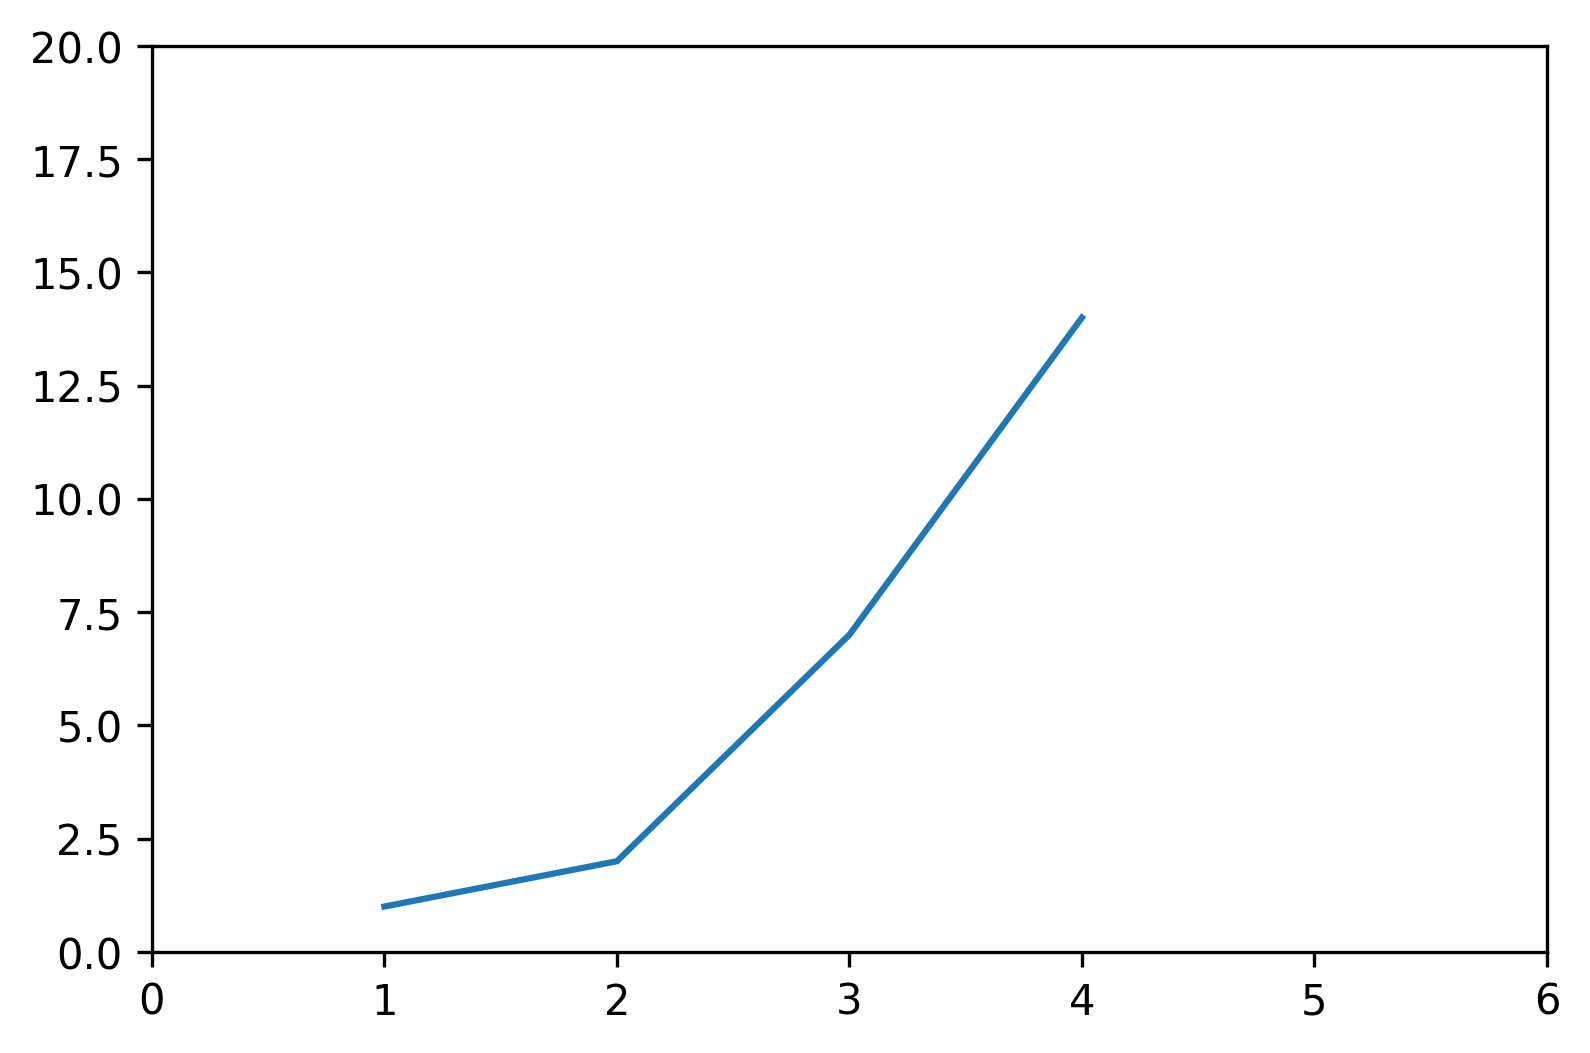

In [82]:
from matplotlib import pyplot as plt
plt.figure(dpi=300)
plt.plot([1, 2, 3, 4], [1, 2, 7, 14])
plt.axis([0, 6, 0, 20])
plt.show()

## Task 4

Have a [Lissajous curve](https://en.wikipedia.org/wiki/Lissajous_curve)!

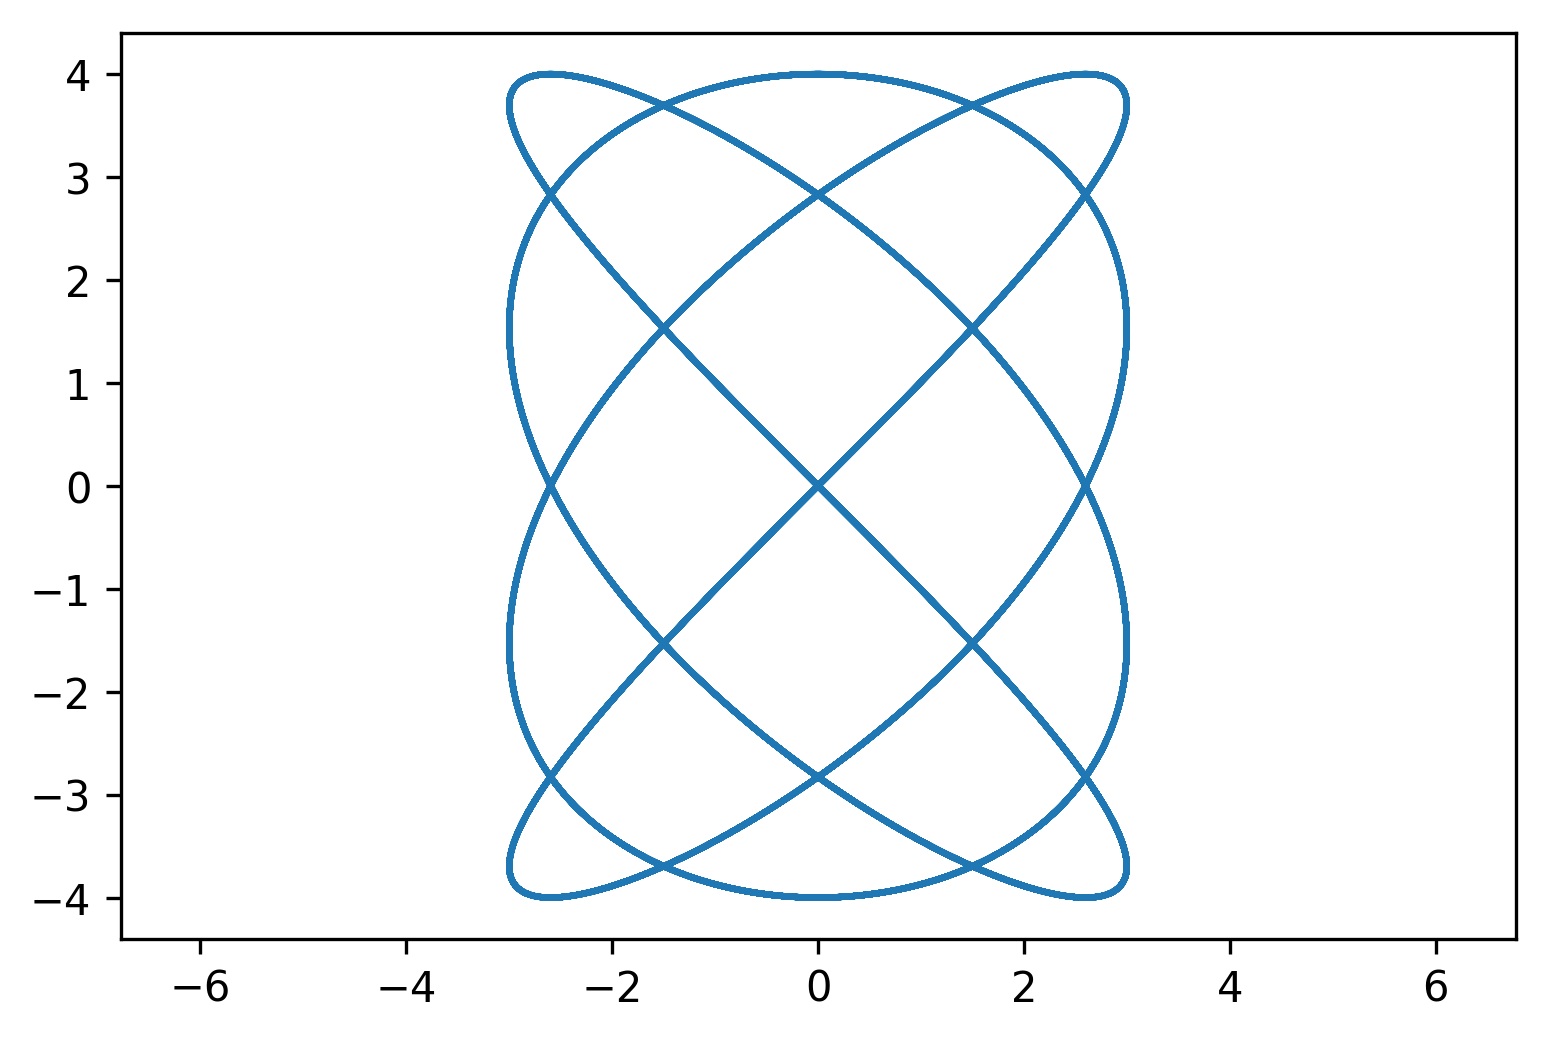

In [83]:
t = np.linspace(0, 12, 5000)
x = 3 * np.sin(2 * np.pi * 4 * t)
y = 4 * np.cos(2 * np.pi * 3 * t)
plt.figure(dpi=300)
plt.plot(x, y)
plt.axis('equal')
plt.show()

## Task 5

My GitHub account can be found at [https://github.com/dlej](https://github.com/dlej).

## Task 6

My GitHub project for this class can be fount at [https://github.com/dlej/elec576](https://github.com/dlej/elec576).